In [1]:
!pip install networkx

     |████████████████████████████████| 1.6MB 884kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [31]:
import numpy as np
import networkx as nx
np.random.seed(42)

In [32]:
# also could be nx.gnr_graph
nodes = 50 
G = nx.scale_free_graph(nodes)

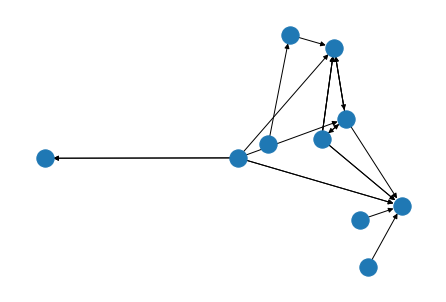

In [28]:
nx.draw(G)

In [26]:
a = nx.to_numpy_matrix(G)
a

matrix([[0., 4., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [29]:
nx.shortest_path(G)

{0: {0: [0], 1: [0, 1], 2: [0, 1, 2], 4: [0, 1, 4]},
 1: {1: [1], 2: [1, 2], 0: [1, 0], 4: [1, 4]},
 2: {2: [2], 0: [2, 0], 1: [2, 1], 4: [2, 4]},
 3: {3: [3], 0: [3, 0], 4: [3, 4], 5: [3, 5], 1: [3, 1], 2: [3, 1, 2]},
 4: {4: [4]},
 5: {5: [5]},
 6: {6: [6], 0: [6, 0], 1: [6, 0, 1], 2: [6, 0, 1, 2], 4: [6, 0, 1, 4]},
 7: {7: [7], 4: [7, 4]},
 8: {8: [8], 4: [8, 4]},
 9: {9: [9],
  6: [9, 6],
  0: [9, 6, 0],
  1: [9, 6, 0, 1],
  2: [9, 6, 0, 1, 2],
  4: [9, 6, 0, 1, 4]}}

In [34]:
!mkdir training_data 
import os
curr_path = os.getcwd()
curr_path

mkdir: cannot create directory ‘training_data’: File exists


'/notebooks'

In [30]:
def process_g_paths(dict_pathes, n=50):
    start_path_pairs = []
    for k_i, v_i in dict_pathes.values():
        start_vector = np.zeros(n)
        for k_j, v_j in v_i.values():
            start_vector[k_i] = 1
            start_vector[k_j] = 1
            path = np.zeros(n)
            for i in v_j:
                path[i] = 1
            start_path_pairs.append((start_vector, path))
    return start_path_pairs

In [ ]:
from numpy import savez_compressed        

In [ ]:
for i in range(5000):
    g = nx.scale_free_graph(nodes)
    adj_g = nx.to_numpy_matrix(g)
    vector_pairs  = process_g_paths(nx.shortest_path(g), nodes)
    # make dirs
    ith_path = curr_path + '/' + str(i)
    os.mkdir(ith_path)
    ith_target_path = ith_path + '/' + 'target' 
    os.mkdir(ith_target_path)
    # save files
    savez_compressed(ith_path + '/adj.npz', adj_g)
    for pair in vector_pairs:
        savez_compressed(ith_target_path + '/start.npz', pair[0])
        savez_compressed(ith_target_path + '/path.npz', pair[1])
    